<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/metrics_for_classification_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

# Summary

The [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module implements functions assessing prediction error for classification, regresion and clustering.

You can check the scikit-learn documention if further information is required about "[*Metrics and scoring: quantifying the quality of predictions*](https://scikit-learn.org/stable/modules/model_evaluation.html)".

In this notebook, we will see some of the metrics that scikit-learn provides for [classification](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) and also write our own functions from scratch to understand the math behind a few of them.

# Introduction

Imagine a study evaluating a test that screens people for a disease. Each person taking the test either has or does not have the disease. The test outcome can be positive (classifying the person as having the disease) or negative (classifying the person as not having the disease). Therefore, we can group the people under study in one of the four following groups:

 - **True positive (TP)**: Sick people (actual = 1) correctly identified as sick (predicted = 1)
 - **False positive (FP)**: Healthy people (actual = 0) incorrectly identified as sick (predicted = 1)
 - **True negative (TN)**: Healthy people (actual = 0) correctly identified as healthy (predicted = 0)
 - **False negative (FN)**: Sick people (actual = 1) incorrectly identified as healthy (predicted = 0)

These four groups can be represented in the following figure (extracted from [here](https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019)).


<img src="https://miro.medium.com/max/407/1*2WBrkJP8qKO3DDG7Lvg0hg.png">

In the figure above, you can see that:
- All the samples that have the condition (e.g. having disease): True Positives + False Negatives (right part of the image)
- All the samples that do not have the condition (e.g. not having disease): True Negatives + False Positives (left part of the image)

The figure above can also be displayed using a confusion matrix as shown below:

<img src="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/confusion_matrix.png">

Using TP, FP, FN and TN, we can calculate some metrics: sensitivity (or recall), specificity, and precision.

**Sensitivity** is a measure of how well a test can **identify true positives**. Sensitivity can also be referred to as the **recall**, hit rate, or **true positive rate**. It is the percentage, or proportion, of true positives out of all the samples that have the condition (true positives and false negatives). It can be seen as "*how sure you are that you are not missing any positives*".

**Specificity** is a measure of how well a test can **identify true negatives**. Specificity is also referred to as selectivity or **true negative rate**, and it is the percentage, or proportion, of the true negatives out of all the samples that do not have the condition (true negatives and false positives).

**Precision** is intuitively the ability of the classifier not to label as positive a sample that is negative. Precision can also be referred as positive predictive values (PPV). It is the proportions of positive results that are true positive. Precision can be seen as "*how sure you are of your true positives*".



# Implementing our own functions provinding main metrics for classification

We can code our own scoring functions using only NumPy. Firs of all, we have to calculate TP, FN, FP and TN. Then, and based on these metrics, we can calculate the confusion matrix, sensitivity, specificity, precision, recall and F1 score. Later on, we see how to apply these function for evaluation purposes and also compare the resuls with the metrics and scoring functions included in [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module.

In [ ]:
import numpy as np

def find_TP(y_true, y_pred):
  # counts the number of true positives (y_true = 1, y_pred = 1)
  return sum((y_true == 1) & (y_pred == 1))

def find_FN(y_true, y_pred):
  # counts the number of false negatives (y_true = 1, y_pred = 0)
  return sum((y_true == 1) & (y_pred == 0))

def find_FP(y_true, y_pred):
  # counts the number of false positives (y_true = 0, y_pred = 1)
  return sum((y_true == 0) & (y_pred == 1))

def find_TN(y_true, y_pred):
  # counts the number of true negatives (y_true = 0, y_pred = 0)
  return sum((y_true == 0) & (y_pred == 0))

def find_conf_matrix_values(y_true,y_pred):
  # calculate TP, FN, FP, TN
  TP = find_TP(y_true,y_pred)
  FN = find_FN(y_true,y_pred)
  FP = find_FP(y_true,y_pred)
  TN = find_TN(y_true,y_pred)
  return TP,FN,FP,TN

def my_confusion_matrix(y_true, y_pred):
  TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
  return np.array([[TN,FP],[FN,TP]])

def my_accuracy_score(y_true, y_pred):
  # calculates the fraction of samples predicted correctly
  TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred) 
  return (TP + TN)/(TP + FN + FP + TN)

def my_recall_score(y_true, y_pred):
  # True positive rate (TPR), recall, sensitivity
  # calculates the fraction of positive samples predicted correctly
  TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)  
  return TP / (TP + FN)

def my_sensitivity_score(y_true, y_pred):
  return my_recall_score(y_true, y_pred)

def my_precision_score(y_true, y_pred):
  # calculates the fraction of predicted positives samples that are actually positive
  TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)  
  return TP / (TP + FP)

# tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
# specificity = tn / (tn+fp)
def my_specificity_score(y_true, y_pred):
  # Specificity, selectivity, true negative rate (TNR)
  # Calculates the fraction of negatives that are correctly identified
  TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
  return TN / (TN + FP)

def my_f1_score(y_true, y_pred):
  # calculates the F1 score
  recall = my_recall_score(y_true,y_pred)  
  precision = my_precision_score(y_true,y_pred)  
  return 2 * (precision * recall) / (precision + recall)

def show_metric(my_metric):
  return "{:.2f}%".format(my_metric * 100)

At this point, we are going to show sample examples in order to introduce all the metrics and scoring functions defined above. These examples are extracted [from this tutorial](https://towardsdatascience.com/should-i-look-at-precision-recall-or-specificity-sensitivity-3946158aace1). 

<img align="left"  src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/pencil.jpg" width=40 px>

You can check and complete this notebook with the missing examples included in the afforementioned tutorial.

## Example 1 — Low Precision, High Recall, and High Specificity

<img src="https://miro.medium.com/max/700/1*btcfBuM5Eqqc6rJ3iw3sNQ.png" width=600>

In [ ]:
import numpy as np

y_true = np.array([1,0,0,0,0,0,0,0,0,0])
y_pred = np.array([1,1,1,0,0,0,0,0,0,0])

print("precision: {}".format(show_metric(my_precision_score(y_true, y_pred))))
print("recall: {}".format(show_metric(my_recall_score(y_true, y_pred))))
print("specificity: {}".format(show_metric(my_specificity_score(y_true, y_pred))))
print("sensitivity: {}".format(show_metric(my_sensitivity_score(y_true, y_pred))))
print("accuracy: {}".format(show_metric(my_accuracy_score(y_true, y_pred))))
print("F1 score: {}".format(show_metric(my_f1_score(y_true, y_pred))))

precision: 33.33%
recall: 100.00%
specificity: 77.78%
sensitivity: 100.00%
accuracy: 80.00%
F1 score: 50.00%


From the above:
- If the classifier predicts negative, you can trust it, the example is negative.
- If the example is negative, you can’t be sure it will predict it as negative (specificity=78%).
- If the classifier predicts positive, you can’t trust it (precision=33%)
- If the example is positive, you can trust the classifier (recall=100%).

## Example 2 — High Precision, High Recall, and Low Specificity

<img src="https://miro.medium.com/max/2400/1*5tE354A0ULFcQJBB0iroLQ.png" width=600>

In [ ]:
import numpy as np

y_true = np.array([0,1,1,1,1,1,1,1,1,1])
y_pred = np.array([1,1,1,1,1,1,1,1,1,1])

print("precision: {}".format(show_metric(my_precision_score(y_true, y_pred))))
print("recall: {}".format(show_metric(my_recall_score(y_true, y_pred))))
print("specificity: {}".format(show_metric(my_specificity_score(y_true, y_pred))))
print("sensitivity: {}".format(show_metric(my_sensitivity_score(y_true, y_pred))))
print("accuracy: {}".format(show_metric(my_accuracy_score(y_true, y_pred))))
print("F1 score: {}".format(show_metric(my_f1_score(y_true, y_pred))))

precision: 90.00%
recall: 100.00%
specificity: 0.00%
sensitivity: 100.00%
accuracy: 90.00%
F1 score: 94.74%


From the above:
- Predicting everything as positive clearly can’t be a good idea. However, because the population is imbalanced the precision is relatively high (90%) 
- The recall is 100% because all the positive examples are predicted as positive.  
- The specificity is 0% because no negative example is predicted as negative.

## Example 3 — High Precision, Low Recall, and High Specificity

<img src="https://miro.medium.com/max/700/1*595ygSPyeaRYuDXYSnfCZQ.png" width=600>

In [ ]:
import numpy as np

y_true = np.array([0,1,1,1,1,1,1,1,1,1])
y_pred = np.array([0,1,0,0,0,0,0,0,0,0])

print("precision: {}".format(show_metric(my_precision_score(y_true, y_pred))))
print("recall: {}".format(show_metric(my_recall_score(y_true, y_pred))))
print("specificity: {}".format(show_metric(my_specificity_score(y_true, y_pred))))
print("sensitivity: {}".format(show_metric(my_sensitivity_score(y_true, y_pred))))
print("accuracy: {}".format(show_metric(my_accuracy_score(y_true, y_pred))))
print("F1 score: {}".format(show_metric(my_f1_score(y_true, y_pred))))

precision: 100.00%
recall: 11.11%
specificity: 100.00%
sensitivity: 11.11%
accuracy: 20.00%
F1 score: 20.00%


From the above:
- If it predicts that an example is positive, you can trust it because it is positive.
- If it predicts it is negative, you can’t trust it, the chances are that it is still positive.

# Scikit-learn classification metrics

At this point we are going to introduce some of the main metrics scikit-learn provides for classification purposes. First of all, let's get [some data](https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019). 
This dataset has the actual labels (`actual_label`) and the prediction probabilities for two models (`model_RF` and `model_LR`). Here the probabilities are the probability of being `class 1`.
Moreover, let's show first rows.

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/andrewwlong/classification_metrics_sklearn/master/data.csv"
df = pd.read_csv(url)
df.head()

,actual_label,model_RF,model_LR
0,1,0.639816,0.531904
1,0,0.490993,0.414496
2,1,0.623815,0.569883
3,1,0.506616,0.443674
4,0,0.418302,0.369532


In most data science projects, you will define a threshold to define which prediction probabilities are labeled as predicted positive vs predicted negative. For now let’s assume the threshold is `0.5`. Let’s add two additional columns that convert the probabilities to predicted labels.

In [ ]:
thresh = 0.5
df['predicted_RF'] = (df.model_RF >= 0.5).astype('int')
df['predicted_LR'] = (df.model_LR >= 0.5).astype('int')
df.head()

,actual_label,model_RF,model_LR,predicted_RF,predicted_LR
0,1,0.639816,0.531904,1,1
1,0,0.490993,0.414496,0,0
2,1,0.623815,0.569883,1,1
3,1,0.506616,0.443674,1,0
4,0,0.418302,0.369532,0,0


## Accuracy

**Accuracy score**
The [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) function computes the accuracy, either the fraction of correct predictions (default) or the count (`normalize=False`) of correct predictions.

$\ \texttt{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i)$

Accuracy is the most common evaluation metric for classification problems. However, it should only be used when:

- There are an equal number of observations in each class
- All predictions and prediction errors are equally important

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(df["actual_label"], df["predicted_RF"]))
print(my_accuracy_score(df["actual_label"], df["predicted_RF"]))

0.6705165630156111
0.6705165630156111


## Balanced accuracy

[`balanced_accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html) can be used in binary and multiclass classification problems to deal with imbalanced datasets. `balanced_accuracy_score()` returns the average accuracy per class. In the example below, we have 10 samples for 2 classes with 7 observations in class 0 and 3 observations in class 1. Therefore, `accuracy_score()` give as a value of (7/10 = 0.7) and `balanced_accuracy_score()` would return (6/7 + 1/3)/2 = 0,5952.



In [ ]:
from sklearn.metrics import balanced_accuracy_score

y_true = np.array([1,1,0,0,0,0,0,0,0,1])
y_pred = np.array([0,1,0,0,0,0,0,0,1,0])

print(accuracy_score(y_true, y_pred))
print(balanced_accuracy_score(y_true, y_pred))

0.7
0.5952380952380952


## Confusion matrix

A confusion matrix is a technique for summarizing the performance of a classification algorithm. Classification accuracy alone can be misleading if you have an unequal number of observations in each class or if you have more than two classes in your dataset.
Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making.

In [ ]:
from sklearn.metrics import confusion_matrix

# [TN,FP],[FN,TP]
print(confusion_matrix(df['actual_label'], df['predicted_RF']))
print(my_confusion_matrix(df['actual_label'], df['predicted_RF']))

[[5519 2360]
 [2832 5047]]
[[5519 2360]
 [2832 5047]]


We can also show the confusion matrix using [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html), which provides a nice visualization. Based on the documentation "*It is recommend to use `plot_confusion_matrix` to create a `ConfusionMatrixDisplay`*". The main problem of using [`plot_confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) is that requires an `estimator` as first argument. So, in this case, we have to use `ConfusionMatrixDisplay` directly because we have not defined a classifier.

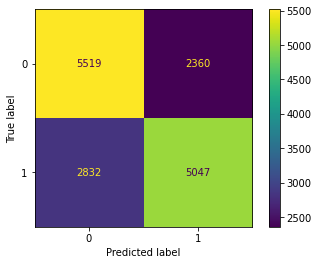

In [ ]:
# https://stackoverflow.com/questions/59165149/plot-confusion-matrix-with-scikit-learn-without-a-classifier

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(df['actual_label'], df['predicted_RF'])
display_labels = ["0", "1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp = disp.plot(values_format='.0f')
plt.show()

The confusion matrix can also be normalized. The parameter `normalize` allows to report ratios instead of counts. The confusion matrix can be normalized in 3 different ways: `'pred'`, `'true'`, and `'all'` which will divide the counts by the sum of each columns, rows, or the entire matrix, respectively.

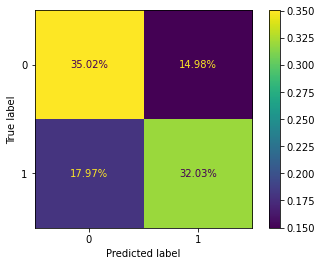

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(df['actual_label'], df['predicted_RF'], normalize='all')
display_labels = ["0", "1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp = disp.plot(values_format='.2%')
plt.show()

## Precision

The [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) is intuitively the ability of the classifier not to label as positive a sample that is negative. It can be computed using `precision_score()`:


In [ ]:
from sklearn.metrics import precision_score

print(precision_score(df['actual_label'], df['predicted_RF']))
print(my_precision_score(df['actual_label'], df['predicted_RF']))

0.681382476036182
0.681382476036182


## Recall

The [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) is intuitively the ability of the classifier to find all the positive samples. It can be computed using `recall_score()`:


In [ ]:
from sklearn.metrics import recall_score

print(recall_score(df['actual_label'], df['predicted_RF']))
print(my_recall_score(df['actual_label'], df['predicted_RF']))

0.6405635232897576
0.6405635232897576


## F1 Score

[`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) computes the F1 score, also known as balanced F-score or F-measure. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. 

In [ ]:
from sklearn.metrics import f1_score

print(f1_score(df['actual_label'], df['predicted_RF']))
print(my_f1_score(df['actual_label'], df['predicted_RF']))

0.660342797330891
0.660342797330891


## Classification report

The [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function builds a text report showing the main classification metrics.

- The recall means "how many of this class you find over the whole number of element of this class"
- The precision will be "how many are correctly classified among that class"
- The f1-score is the harmonic mean between precision & recall
- The support is the number of occurence of the given class in your dataset

Here is a small example with custom `target_names`.

In [ ]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(df['actual_label'], df['predicted_RF'], target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.66      0.70      0.68      7879
     class 1       0.68      0.64      0.66      7879

    accuracy                           0.67     15758
   macro avg       0.67      0.67      0.67     15758
weighted avg       0.67      0.67      0.67     15758



## ROC Curves

So far, we have set a threshold of `0.5` for selecting which samples are predicted as positive. Based on this threshold all metrics that we have seen above are calculated accordingly. Moreover, this threshold can be adjusted to tune the behavior of the model for a specific problem.

When making a prediction for a binary or two-class classification problem, the two types of error that we could make are: false positive error and false negative error. By predicting probabilities and calibrating a threshold, a balance of these two errors can be stablished.

A useful tool when predicting the probability of a binary outcome is the Receiver Operating Characteristic curve, or ROC curve.

[`roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) computes Receiver operating characteristic (ROC). Note that this implementation is restricted to the binary classification task.

It is a plot of the **false positive rate** (x-axis) versus the **true positive rate** (y-axis) for a number of different candidate threshold values between 0.0 and 1.0.

- The true positive rate is also referred to as sensitivity.
- The false positive rate is also referred to as the inverted specificity (1 - specificity)

An ROC space is defined by FPR and TPR as x and y axes, respectively, which depicts relative trade-offs between true positive (benefits) and false positive (costs). Since TPR is equivalent to sensitivity and FPR is equal to 1 − specificity, the ROC graph is sometimes called the sensitivity vs (1 − specificity) plot.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/Roc-draft-xkcd-style.svg/500px-Roc-draft-xkcd-style.svg.png">

Some notes from the figure shown previously:

- The best possible prediction method would yield a point in the upper left corner or coordinate (0,1) of the ROC space, representing 100% sensitivity (no false negatives) and 100% specificity (no false positives).

- A random guess would give a point along a diagonal line (the so-called line of no-discrimination) from the left bottom to the top right corners (regardless of the positive and negative base rates).

- The diagonal divides the ROC space. 
 - Points above the diagonal represent good classification results (better than random).
 - Points below the line represent bad results (worse than random). Note that the output of a consistently bad predictor could simply be inverted to obtain a good predictor.

Additionally, the Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) can be calculated using the [`roc_auc_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)function. 

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(df["actual_label"], df["model_RF"])
print(roc_auc_score(df["actual_label"], df["model_RF"]))

0.73829514083596


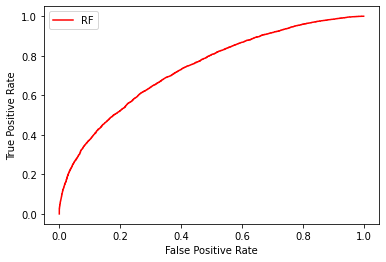

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr,'r-',label = 'RF')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

A high threshold results in a point in the bottom left. A low threshold results in a point in the top right. This means as you decrease the threshold you get higher TPR at the cost of a higher FPR

## Precision-Recall Curves

The precision and recall can be calculated for thresholds using the [precision_recall_curve()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) function that takes the true output values and the probabilities for the positive class as input and returns the precision, recall and threshold values.

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(df["actual_label"], df["model_RF"])

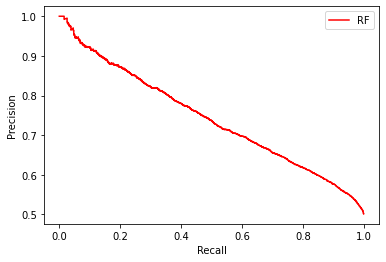

In [ ]:
import matplotlib.pyplot as plt

plt.plot(recall, precision, 'r-',label = 'RF')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

The Precision-Recall curve (PRC) shows the trade-off between precision and recall for different thresholds. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.


Generally, the use of ROC curves and precision-recall curves are as follows:

- ROC curves should be used when there are roughly equal numbers of observations for each class.
- Precision-Recall curves should be used when there is a moderate to large class imbalance.

The reason for this recommendation is that [ROC curves present an optimistic picture of the model on datasets with a class imbalance](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/).

# Comparing with dummy classifiers

[DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) is a classifier that makes predictions using simple rules. This classifier is useful as a simple baseline to compare with other (real) classifiers. Do not use it for real problems.



In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")

X = np.zeros(df.shape[0]) # ignored
dummy_clf.fit(X, df["actual_label"])

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_dummy, tpr_dummy, thresholds_dummy = roc_curve(df["actual_label"], dummy_clf.predict(X))

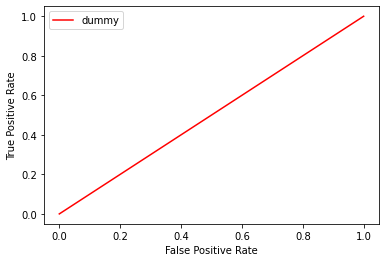

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr_dummy, tpr_dummy,'r-',label = 'dummy')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Conclusions

In this notebook, we have seen some of the metrics that scikit-learn provides for classification and also we have written our own functions from scratch. More specifically, we have seen how to compute and calculate: accuracy, balanced accuracy, confusion matrix, precision, recall, F1 score, and also some interesting functionallities like the classification report, ROC curves, precision-recall curves and dummy classifiers.

Finally, fell free to check these interesting tutorials, from which many of the content of this notebook is based:

- [Data Science Performance Metrics for Everyone](https://towardsdatascience.com/data-science-performance-metrics-for-everyone-4d68f4859eef) 
- [Understanding Data Science Classification Metrics in Scikit-Learn in Python](https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019)
- [How to Use ROC Curves and Precision-Recall Curves for Classification in Python](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

Finally, it is also recommend to take the first course ["AI for Medical Diagnosis](https://www.coursera.org/learn/ai-for-medical-diagnosis)" of the [Coursera AI for Medicine Specialization](https://www.coursera.org/specializations/ai-for-medicine), where the evaluation of diagnostic models is carried out.